# CREDIT DEFAULT EDA AND CLASSIFICATION

This kernel consists of two objectives:

1.Perform exploratory analysis to extract meaningful insight from the data and identify the best features to be used for modeling. <br> <br>
2.Train, test, and refine various classification models to best predict Credit Default. The predictive algorithms to be trained are: <br>
>a.Logistic Regression <br>
>b.Kernel Support Vector Classifier (Kernel SVC) <br>
>c.K-Nearest Neighbors (KNN) <br>
    d.Decision Tree <br>
    e.Random Forest <br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score
sns.set()

In [4]:
# Importing the dataset
data = pd.read_excel('case_study_data.xlsx')

In [3]:
data.head(3)

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

In [5]:
data.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000,2.441000,2.155000,1.300000
std,18.055564,4234.100176,1.572016,1.570292,17.065664,0.697858,0.362086,0.458487
min,6.000000,375.000000,2.000000,2.000000,29.000000,2.000000,2.000000,1.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000,2.000000,2.000000,1.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000,2.000000,2.000000,1.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000,3.000000,2.000000,2.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000,6.000000,3.000000,2.000000


In [6]:
def basic_details(dataset):
    b = pd.DataFrame()
    b['Missing value'] = dataset.isnull().sum().sort_values(ascending=False)
    b['dtype'] = dataset.dtypes
    return b
basic_details(data)

,Missing value,dtype
status,0,int64
other_debtors,0,object
duration,0,int64
credit_history,0,object
purpose,0,object
amount,0,int64
svaing_acc,0,object
present_emp_since,0,object
inst_rate,0,int64
personal_status,0,object


We do not have any missing data, so we should proceed to Exploratory Data Analysis

***

# OBJECTIVE 1: EXPLORATORY DATA ANALYSIS

In [7]:
#Creating a data frame with numerical varibles only
numerical_data=data.select_dtypes(exclude='object')
numerical_data.head(2)

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
0,9,1754,6,6,101,3,2,1
1,72,8927,3,3,33,2,2,2


## Pearson's Correlation Matrix

The Pearson's correlation coefficient (r) is a measure of linear correlation between two variables. It's value lies between -1 and +1, -1 indicating total negative linear correlation, 0 indicating no linear correlation and 1 indicating total positive linear correlation.

In [8]:
numerical_data.corr()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
duration,1.000000,0.625128,0.066263,0.024970,-0.037106,-0.026296,-0.024283,0.214668
amount,0.625128,1.000000,-0.272906,0.018909,0.032873,0.016287,0.017143,0.154739
inst_rate,0.066263,-0.272906,1.000000,0.047184,0.056342,0.007988,-0.066704,0.071108
residing_since,0.024970,0.018909,0.047184,1.000000,0.268296,0.102776,0.045624,-0.000139
age,-0.037106,0.032873,0.056342,0.268296,1.000000,0.164017,0.117814,-0.090807
num_credits,-0.026296,0.016287,0.007988,0.102776,0.164017,1.000000,0.117438,-0.044738
dependents,-0.024283,0.017143,-0.066704,0.045624,0.117814,0.117438,1.000000,-0.003015
status,0.214668,0.154739,0.071108,-0.000139,-0.090807,-0.044738,-0.003015,1.000000


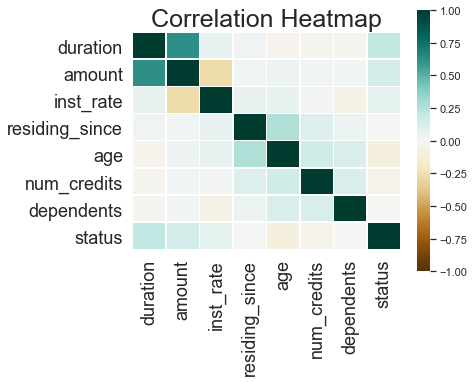

In [9]:
#Creating heatmap
corr_matrix = numerical_data.corr()

sns.heatmap(corr_matrix,
               cmap='BrBG',
               vmin = -1,
               vmax = 1, linewidths=.5, cbar_kws={"shrink":1.2}, annot_kws={'size':16})
plt.tick_params(axis = 'x', labelsize=18, rotation = 90)
plt.tick_params(axis = 'y', labelsize=18)
plt.title('Correlation Heatmap', fontsize = 25)
plt.show()

__Inference:__ As we can see the correlation heatmap , there is no significant correlation observed in the data. Since maximum correlation observed is 0.6, hence we can say that there is no multicollinearity in the data
***

## Cramer's V correlation matrix

Cramér's V is an association measure for nominal random variables. The coefficient ranges from 0 to 1, with 0 indicating independence and 1 indicating perfect association. The empirical estimators used for Cramér's V have been proved to be biased, even for large samples.

In [10]:
#Creating a data frame with categorical varibles only
categorial_data = data[[i for i in data.columns if i not in ('duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'dependents','status')]]
categorial_data.head(2)

,checkin_acc,credit_history,purpose,svaing_acc,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201


In [11]:
#Creating a instance of label encoder
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in categorial_data.columns:
    data_encoded[i]=label.fit_transform(categorial_data[i])

from scipy.stats import chi2_contingency

def cramers_V(var1,var2):
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded:
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

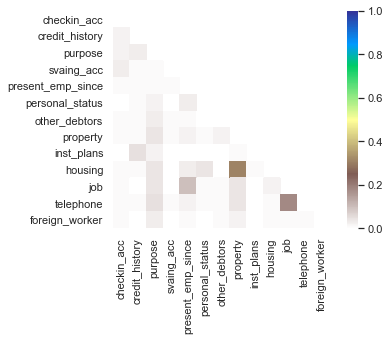

In [12]:
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True,cmap='terrain_r')

plt.show()

__Inference:__ We can clearly see that coefficient values are near to 0, so we can say that variables are independent
***

### Since this is the classification problem, we should convert our output varibale as Categorical variable

In [5]:
data['status']=pd.Categorical(data['status'])

In [7]:
b=data.groupby(['inst_rate','status']).inst_rate.count().unstack()
type(b)

pandas.core.frame.DataFrame

In [6]:
a=data.groupby(['inst_rate','status']).inst_rate.count()
type(a)

pandas.core.series.Series

status       1    2
inst_rate          
2          102   34
3          169   62
5          112   45
6          317  159


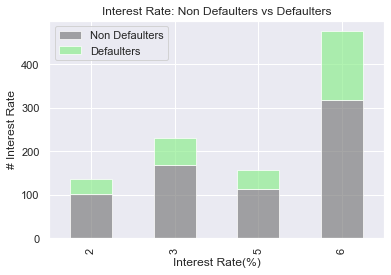

In [14]:
print(data.groupby(['inst_rate','status']).inst_rate.count().unstack())

# Interest Rate visualization
pclass = data.groupby(['inst_rate','status']).inst_rate.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = True, 
                   title = 'Interest Rate: Non Defaulters vs Defaulters', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Interest Rate(%)')
p1.set_ylabel('# Interest Rate')
p1.legend(['Non Defaulters','Defaulters'])
plt.show()

##### Interest Rate Insights:

1.Most of the customers with 2,3,5 interest rate were not defaulters<br>
2.Approximately  33% of customers were defaulters when interest rate was 6%

status         1    2
num_credits          
2            433  200
3            241   92
5             22    6
6              4    2


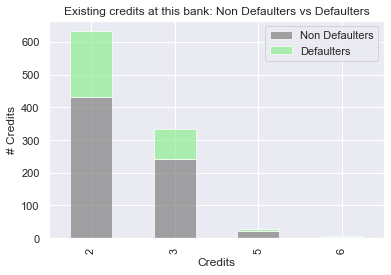

In [15]:
print(data.groupby(['num_credits','status']).num_credits.count().unstack())

# Existing credits visualization
pclass = data.groupby(['num_credits','status']).num_credits.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = True, 
                   title = 'Existing credits at this bank: Non Defaulters vs Defaulters', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Credits')
p1.set_ylabel('# Credits')
p1.legend(['Non Defaulters','Defaulters'])
plt.show()

##### Credits Insights:

1.Most of the customers with 3,5,6 credits were not defaulters <br>
2.Approximately 31% of customers were defaulters when existing credits at this bank were 2

In [16]:
bins = [18, 40, 50, 60,120]
labels = ['18-40', '41-50', '51-60','61+']
data['age_range'] = pd.cut(data.age, bins, labels = labels,include_lowest = True)

status       1   2
age_range         
18-40      146  94
41-50      189  87
51-60      163  47
61+        202  72


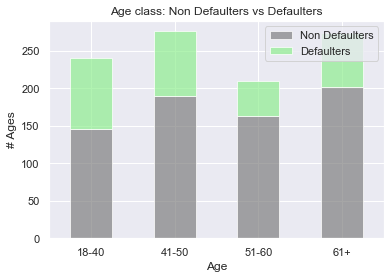

In [17]:
print(data.groupby(['age_range','status']).age_range.count().unstack())

# visualization of Age
pclass = data.groupby(['age_range','status']).age_range.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = True, 
                   title = 'Age class: Non Defaulters vs Defaulters', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Age')
p1.set_ylabel('# Ages')
p1.legend(['Non Defaulters','Defaulters'])
p1.tick_params(axis='x', labelrotation = 0)
plt.show()

##### Age Insights: 

Younger People are most likely to be defaulters specially who are below 40

status             1    2
loan_range               
Short term loan  343   90
Long term loan   357  210


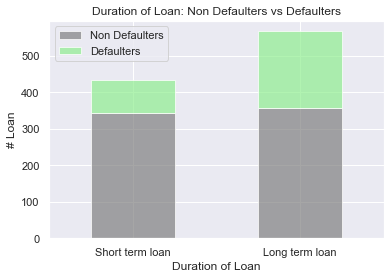

In [18]:
bins1 = [0,24, 110]
labels1 = ['Short term loan', 'Long term loan']
data['loan_range'] = pd.cut(data.duration, bins1, labels = labels1,include_lowest = True)

print(data.groupby(['loan_range','status']).loan_range.count().unstack())

# Duration of Loan visualization
pclass = data.groupby(['loan_range','status']).loan_range.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = True, 
                   title = 'Duration of Loan: Non Defaulters vs Defaulters', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Duration of Loan')
p1.set_ylabel('# Loan')
p1.legend(['Non Defaulters','Defaulters'])
p1.tick_params(axis='x', labelrotation = 0)
plt.show()

##### Duration Insights:

 Long term loans are more likely to get defaulted

status          1   2
amount_range         
0-2000        163  72
2000-3500     206  68
3500-7000     211  75
7000+         120  85


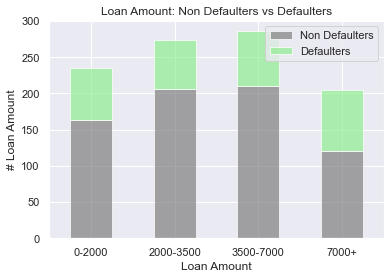

In [19]:
bins2 = [0, 2000, 3500, 7000,30000]
labels2 = ['0-2000', '2000-3500','3500-7000','7000+']
data['amount_range'] = pd.cut(data.amount, bins2, labels = labels2,include_lowest = True)

print(data.groupby(['amount_range','status']).amount_range.count().unstack())

# Loan Amount visualization
pclass = data.groupby(['amount_range','status']).amount_range.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = True, 
                   title = 'Loan Amount: Non Defaulters vs Defaulters', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Loan Amount')
p1.set_ylabel('# Loan Amount')
p1.legend(['Non Defaulters','Defaulters'])
p1.tick_params(axis='x', labelrotation = 0)
plt.show()

##### Loan Amount Insights: 

Customers who are having Loan of 7000 or greater than 7000 are more likely to get defaulted

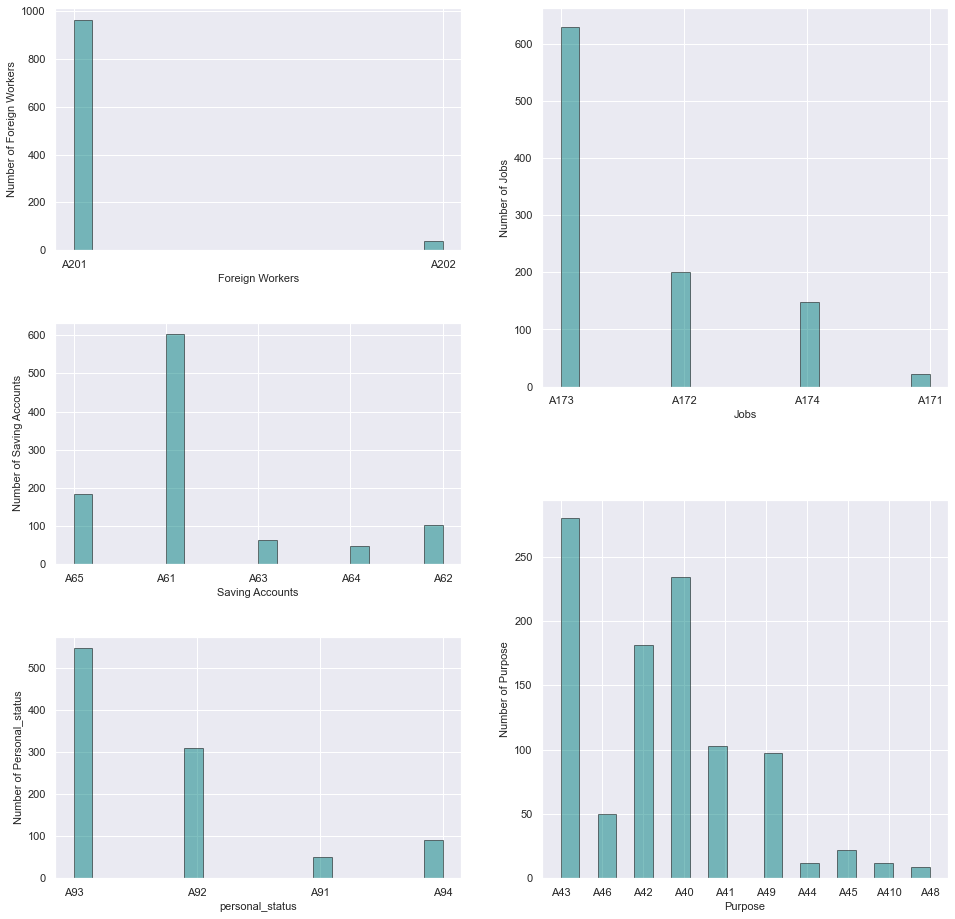

In [20]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(data['foreign_worker'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Foreign Workers', fontsize = 11)
ax1.set_ylabel('Number of Foreign Workers',fontsize = 11)

ax2 = fig.add_subplot(323)
ax2.hist(data['svaing_acc'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Saving Accounts',fontsize = 11)
ax2.set_ylabel('Number of Saving Accounts',fontsize = 11)

ax3 = fig.add_subplot(325)
ax3.hist(data['personal_status'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('personal_status',fontsize = 11)
ax3.set_ylabel('Number of Personal_status',fontsize = 11)

ax4 = fig.add_subplot(222)
ax4.hist(data['job'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Jobs',fontsize = 11)
ax4.set_ylabel('Number of Jobs',fontsize = 11)

ax5 = fig.add_subplot(224)
ax5.hist(data['purpose'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Purpose',fontsize = 11)
ax5.set_ylabel('Number of Purpose',fontsize = 11)
    
plt.show()

##### Insights:

1.Most  of  the  Customers  do  A173  type  of  job<br>
2.Majority  of  the  Savings  Accounts  are  types  of  A61<br>
3.Most  of  the  Customers  belong  to  A93  Personal  Status<br>
4.Usually  the  purpose  of taking  loan  is  A43  or  A40<br>
5.Most  of  them  are  A201  foreign  workers

***

## Dealing with Outliers

#### Age Variable

Text(0, 0.5, 'age')

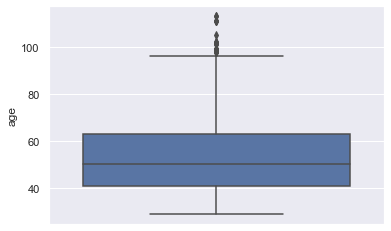

In [21]:
#Using box plot to visualize the outliers in Age column
sns.boxplot(y='age',data=data)
plt.xticks(rotation=90)
plt.ylabel('age')

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : 1.0201622094283025


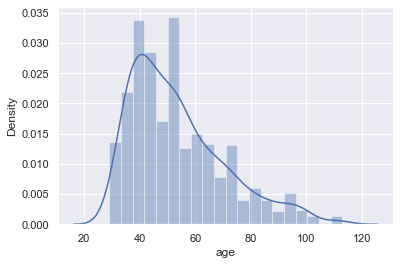

In [22]:
sns.distplot(data['age'])
print('Skewness :',data['age'].skew())

In [23]:
#Using Inter Quartile Range for removing Outliers
def remove_outlier_IQR(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    data_final=data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))]
    return data_final

In [24]:
data_outlier_removed=remove_outlier_IQR(data.age)
data_outlier_removed=pd.DataFrame(data_outlier_removed)
ind_diff=data.index.difference(data_outlier_removed.index)

Text(0, 0.5, 'Age')

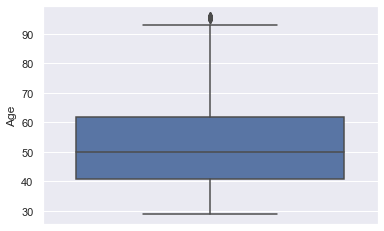

In [25]:
for i in range(0, len(ind_diff),1):
    data_final=data.drop([ind_diff[i]])
    data=data_final
#Let's again plot the box plot and see how IQR has helped to get rid of outliers    
sns.boxplot(y='age',data=data_final)
plt.xticks(rotation=90)
plt.ylabel('Age')

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : 0.832778714341758


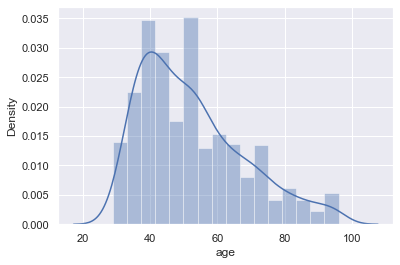

In [26]:
sns.distplot(data['age'])
print('Skewness :',data['age'].skew())

### Amount Variable

Text(0, 0.5, 'amount')

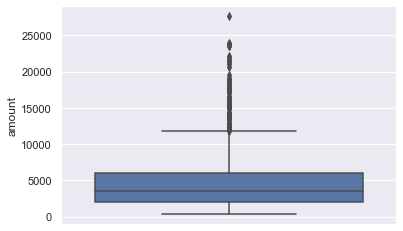

In [27]:
#Using box plot to visualize the outliers in Amount column
sns.boxplot(y='amount',data=data)
plt.xticks(rotation=90)
plt.ylabel('amount')

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : 1.942266017558405


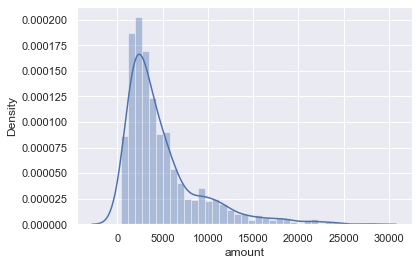

In [28]:
sns.distplot(data['amount'])
print('Skewness :',data['amount'].skew())

Skewness : 1.1333942999281919


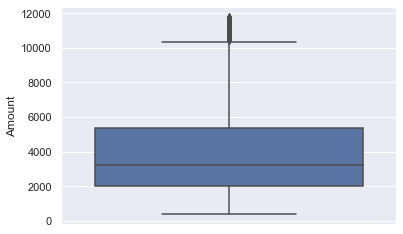

In [29]:
#Again using IQR to deal with outliers
data_outlier_removed=remove_outlier_IQR(data.amount)
data_outlier_removed=pd.DataFrame(data_outlier_removed)
ind_diff=data.index.difference(data_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    data_final=data.drop([ind_diff[i]])
    data=data_final
#Let's again plot the box plot and see how IQR has helped to get rid of outliers
sns.boxplot(y='amount',data=data_final)
plt.xticks(rotation=90)
plt.ylabel('Amount')
print('Skewness :',data['amount'].skew())

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : 1.1333942999281919


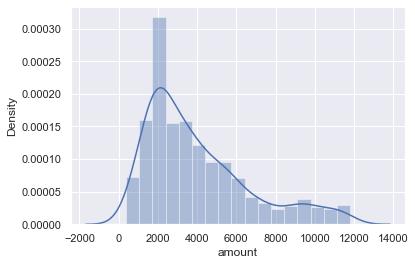

In [30]:
sns.distplot(data['amount'])
print('Skewness :',data['amount'].skew())

***

#### Dropping Telephone column as it is of no use for predicting the defaulters

In [31]:
del data['telephone']

In [32]:
data.head(2)

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,inst_plans,housing,num_credits,job,dependents,foreign_worker,status,age_range,loan_range,amount_range
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A143,A152,2,A173,2,A201,2,18-40,Long term loan,7000+
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A143,A152,2,A172,3,A201,1,61+,Short term loan,2000-3500


***

## GETTING MODEL READY

Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

#### Creating Dependent Variables and Independent Variables

In [33]:
X = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
y = data['status']

In [34]:
# Creating dummy varibles for categorical data
X=pd.get_dummies(X,drop_first=True)

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***

## OBJECTIVE 2: MACHINE LEARNING

Next, we will feed these features into various classification algorithms to determine the best performance using a simple framework: Split, Fit, Predict, Score It.

## Random Forest Classification

In [37]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix
print('Random Forest Classification')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred))

# Accuracy
print('--'*40)
rfc_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classification


Confusion Matrix
[[116  14]
 [ 36  15]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           1       0.76      0.89      0.82       130
           2       0.52      0.29      0.38        51

    accuracy                           0.72       181
   macro avg       0.64      0.59      0.60       181
weighted avg       0.69      0.72      0.70       181

--------------------------------------------------------------------------------
Accuracy 72.38 %


## Decision Tree Classification

In [38]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix
print('Decision Tree Classification')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred))

# Accuracy
print('--'*40)
dtc_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', dtc_accuracy,'%')

Decision Tree Classification


Confusion Matrix
[[103  27]
 [ 25  26]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           1       0.80      0.79      0.80       130
           2       0.49      0.51      0.50        51

    accuracy                           0.71       181
   macro avg       0.65      0.65      0.65       181
weighted avg       0.72      0.71      0.71       181

--------------------------------------------------------------------------------
Accuracy 71.27 %


## Kernel SVC

In [39]:
# Fitting Kernel SVC to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix
print('Kernel SVC')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred))

# Accuracy
print('--'*40)
svm_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', svm_accuracy,'%')

Kernel SVC


Confusion Matrix
[[120  10]
 [ 24  27]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           1       0.83      0.92      0.88       130
           2       0.73      0.53      0.61        51

    accuracy                           0.81       181
   macro avg       0.78      0.73      0.74       181
weighted avg       0.80      0.81      0.80       181

--------------------------------------------------------------------------------
Accuracy 81.22 %


## Logistic Regression

In [40]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[114  16]
 [ 19  32]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.88      0.87       130
           2       0.67      0.63      0.65        51

    accuracy                           0.81       181
   macro avg       0.76      0.75      0.76       181
weighted avg       0.80      0.81      0.80       181

--------------------------------------------------------------------------------
Accuracy 80.66 %


## K-NN

In [41]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix
print('K-NN')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred))

# Accuracy
print('--'*40)
KNN_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', KNN_accuracy,'%')

K-NN


Confusion Matrix
[[108  22]
 [ 30  21]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           1       0.78      0.83      0.81       130
           2       0.49      0.41      0.45        51

    accuracy                           0.71       181
   macro avg       0.64      0.62      0.63       181
weighted avg       0.70      0.71      0.70       181

--------------------------------------------------------------------------------
Accuracy 71.27 %


In [42]:
models = pd.DataFrame({
     'Model': ['Logistic Regression', 'Kernel SVM', 
               'K-Nearest Neighbors', 'Decision Tree', 'Random Forest'],
    'Score': [logreg_accuracy, svm_accuracy, KNN_accuracy, 
               dtc_accuracy, rfc_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Kernel SVM,81.22
0,Logistic Regression,80.66
4,Random Forest,72.38
2,K-Nearest Neighbors,71.27
3,Decision Tree,71.27


### Optimizing the hyperparameters with the help of GridSearchCV for our top two models

***

# Grid Search CV

### Kernel SVC

In [43]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'kernel': ['sigmoid'],"random_state":[0,10,100]}
from sklearn.model_selection import GridSearchCV

# Instantiate grid object
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose = 1)#verbose is the text output describing the process

# Fit to training data
grid.fit(X_train,y_train)

print(grid.best_params_)
print('\n')

y_pred = grid.predict(X_test)
print('SVC with GridSearchCV')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('--'*40)
# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred))

# Accuracy
print('--'*40)
svm_grid_accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy',svm_grid_accuracy,'%')

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 1, 'kernel': 'sigmoid', 'random_state': 0}


SVC with GridSearchCV


Confusion Matrix
[[120  10]
 [ 24  27]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           1       0.83      0.92      0.88       130
           2       0.73      0.53      0.61        51

    accuracy                           0.81       181
   macro avg       0.78      0.73      0.74       181
weighted avg       0.80      0.81      0.80       181

--------------------------------------------------------------------------------
Accuracy 81.22 %


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.9s finished


## Logistic Regression

In [44]:
#grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
# define grid search
grid = dict(solver=solvers)
cv = RepeatedStratifiedKFold(n_splits=100, n_repeats=3, random_state=1)
# Instantiate grid object
grid = GridSearchCV(estimator=model,param_grid=grid, refit = True, verbose = 1,n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)#verbose is the text output describing the process

# Fit to training data
grid.fit(X_train,y_train)

print(grid.best_params_)
print('\n')
y_pred = grid.predict(X_test)
print('Logistic Regression with GridSearchCV')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('--'*40)
# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred))

# Accuracy
print('--'*40)
log_grid_accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print('Accuracy',log_grid_accuracy,'%')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 300 folds for each of 3 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    4.6s


{'solver': 'newton-cg'}


Logistic Regression with GridSearchCV


Confusion Matrix
[[114  16]
 [ 19  32]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           1       0.86      0.88      0.87       130
           2       0.67      0.63      0.65        51

    accuracy                           0.81       181
   macro avg       0.76      0.75      0.76       181
weighted avg       0.80      0.81      0.80       181

--------------------------------------------------------------------------------
Accuracy 80.66 %


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   11.2s finished


In [45]:
models1 = pd.DataFrame({
     'Model': ['Logistic Regression', 'Kernel SVC'],
    'Score': [log_grid_accuracy, svm_grid_accuracy]})
models1.sort_values(by='Score', ascending=False)

,Model,Score
1,Kernel SVC,81.22
0,Logistic Regression,80.66


In [8]:
models1 = pd.DataFrame({
     'Model': ['Logistic Regression'],
    'Score': [1]})
models1.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,1


In [10]:
v=models1.unstack()
v

Model  0    Logistic Regression
Score  0                      1
dtype: object

## So Kernel SVC gave us the best Accuracy of 81.22 %

# Thank You